# **Setup**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# **Data Import**

In [4]:
marketing = pd.read_csv('marketing.csv')

# Inspecting Data
print(marketing.shape)
print(marketing.columns)
marketing.head()

(10037, 12)
Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [3]:
# Summary Statistics
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [5]:
# Missing Values & Data Types
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


# **Data Processing**

In [6]:
# Check Data Type Of Converted Column
print(marketing['converted'].dtype)

# Convert Data Type From Object To Boolean
marketing['converted'] = marketing['converted'].astype('bool')
print(marketing['converted'].dtype)

object
bool


In [8]:
# Create New Boolean Columns
marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads',True, False)
print(marketing.is_house_ads.head(5))

0    True
1    True
2    True
3    True
4    True
Name: is_house_ads, dtype: bool


In [11]:
# Create New Columns
channel_dict = {"House Ads": 1, "Instagram": 2,"Facebook": 3, "Email": 4, "Push": 5}

marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)
print(marketing['channel_code'].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64


In [12]:
# Convert already existing column to datetime column
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

C:\Users\aksha\AppData\Local\Temp\ipykernel_30944\2554422284.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing['date_served'] = pd.to_datetime(marketing['date_served'])


In [13]:
# Create New Column Representing the day of week
marketing['day_served'] = marketing['date_served'].dt.dayofweek

# **Initial Exploratory Analysis**

## **Daily User Count**

In [14]:
# Aggregate unique users that see ads by date
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


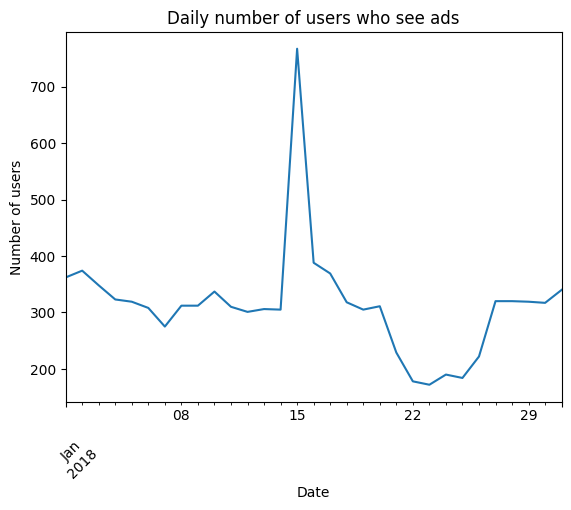

In [15]:
import matplotlib.pyplot as plt

# Plot
daily_users.plot()

# Annotate
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

# **Converion & Retention Rate**

## **Overall Conversion Rate**

In [16]:
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()

conv_rate = subscribers/total
print(round(conv_rate*100, 2), '%')

14.09 %


## **Overall Retention Rate**

In [17]:
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

retention = retained/subscribers
print(round(retention*100, 2), '%')

65.83 %


## **Segment Wise Analysis**

### **Manual Method**

In [19]:
# Subset to include only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']

# Calculate Subscribed & Retained Customer Count
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()

# Calculate Retention Rate
retention_rate = retained/subscribers
print(round(retention_rate*100,2), '%')

58.05 %


### **Advanced Method - Pandas Groupby**

In [20]:
# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [21]:
# Group by subscribing_channel and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [22]:
# Channel Wise Retention Rate
# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


## **Language Wise Analysis**

### **English Language Group**

In [23]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2),'%')

English speaker conversion rate: 13.13 %


### **Grouped Analysis**

In [24]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


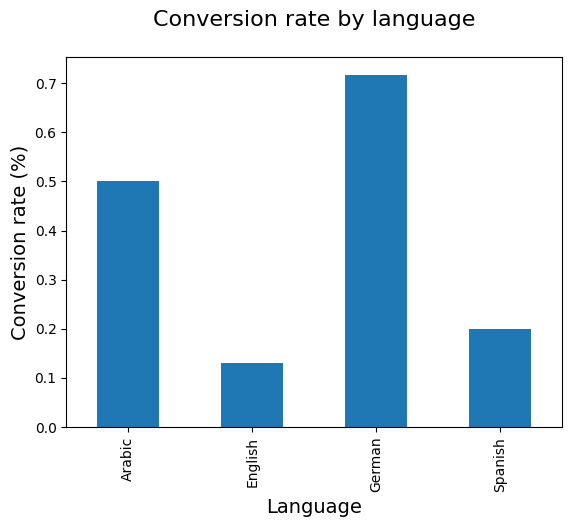

In [25]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

# Display the plot
plt.show()

## **Date Wise Conversion Rate**

In [26]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rates = subscribers/total

In [28]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())

# Rename columns
daily_conversion_rate.columns = ['date_served','conversion_rate']

  date_served  conversion_rate
0  2018-01-01         0.099448
1  2018-01-02         0.098930
2  2018-01-03         0.103448
3  2018-01-04         0.108359
4  2018-01-05         0.125392


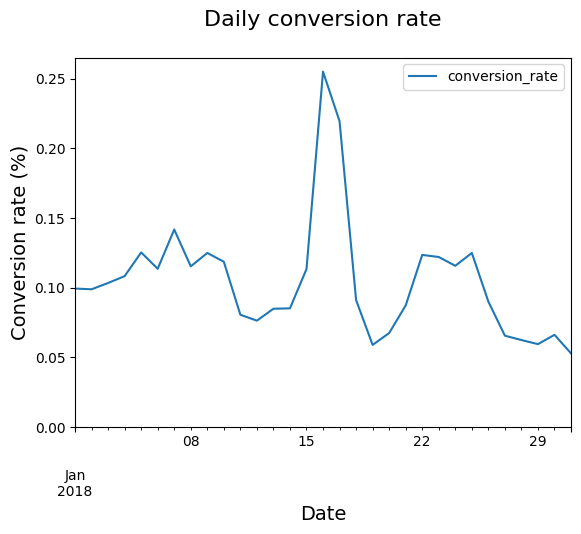

In [31]:
# Create a line chart using daily_conversion_rate
print(daily_conversion_rate.head())

daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

## **Marketing Channel & Age Group Wise Analysis**

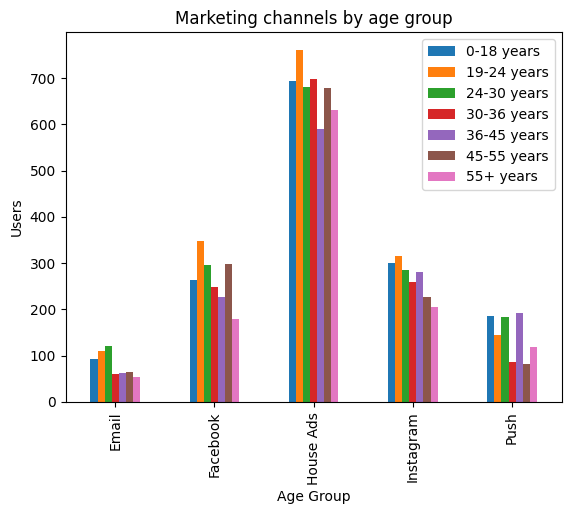

In [32]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right',labels = channel_age_df.columns.values)
plt.show()

## **Date Wise Retention Rate Of Subscribing Channels**

In [33]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [34]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained']==True].groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


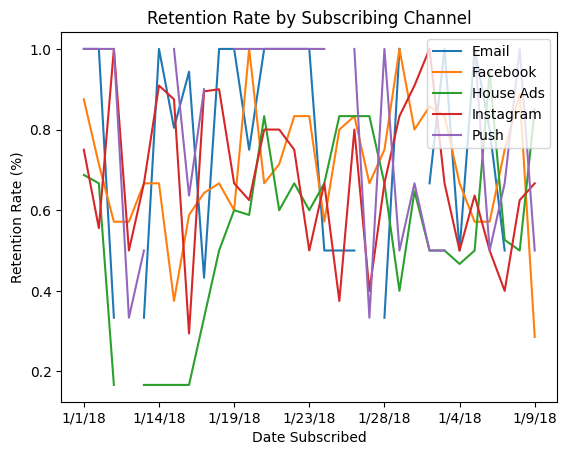

In [35]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc='upper right',labels=retention_rate_df.columns.values)
plt.show()

# **A/B Testing**

- Of Email Campaigns

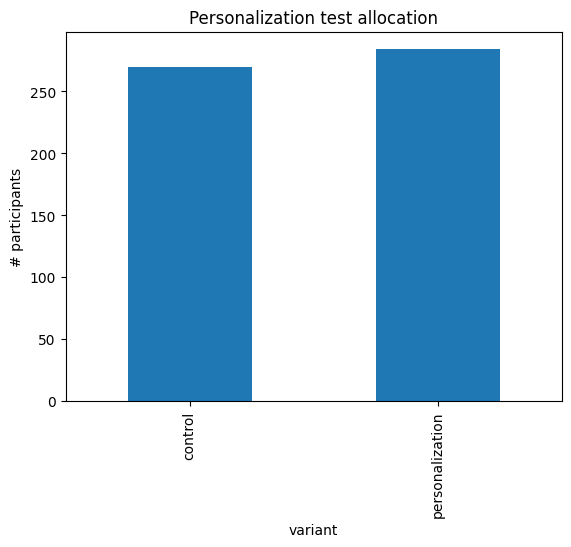

In [36]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel']=='Email']
# print(marketing.columns)

# Group the email DataFrame by variant 
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar',)
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [37]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


## **Calculate Lift**

In [38]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'

In [39]:
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


## **T-Test Significance**

In [47]:
print(control.values.astype(int))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1]


In [53]:
import scipy.stats as stats

T = stats.ttest_ind(control.astype(int),personalization.astype(int))
print(T)

TtestResult(statistic=-2.734329944750507, pvalue=0.006451487844694182, df=552.0)


## **Define Function**

In [54]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control,personalization)) 
      print('t-statistic:', stats.ttest_ind(control.astype(int),personalization.astype(int)), '\n\n')

## **Language Wise AB Testing**

In [55]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


English
lift: 39.0%
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


German
lift: -1.62%
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062677, df=42.0) 


Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524, df=10.0) 




c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
